### 1. "누비자.csv"파일은 주소지별로 보유 누비자 자전거 대수, 설치시기, 위도경도를  나타내는 파일이다.
###      아래의 질문에 해당하는 코드를 작성하시오

In [15]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
import chardet
import pandas as pd
data = pd.read_csv('누비자.csv', encoding='EUC-KR')
data

,번호,터미널명,구,동,주소,등록일자,보관대수,위도,경도
0,1,동읍동중학교 앞,의창구,동읍,경남 창원시 의창구 동읍 신방리 871-6 수로,2011-08-04,16,35.291246,128.675877
1,2,동읍보건지소,의창구,동읍,경남 창원시 의창구 동읍 용잠리 230-7 대,2009-05-14,15,35.279618,128.688719
2,3,동읍주민복지관,의창구,동읍,경남 창원시 의창구 동읍 용잠리 687),2021-07-27,15,35.283956,128.681827
3,4,자여민원센터,의창구,동읍,경남 창원시 의창구 동읍 송정리 98-21,2009-05-14,10,35.277152,128.700567
4,5,주남저수지 주차장,의창구,동읍,경남 창원시 의창구 동읍 월잠리 303-7,2019-10-15,15,35.306059,128.678244
...,...,...,...,...,...,...,...,...,...
278,279,용원공영주차빌딩,진해구,웅동2동,경남 창원시 진해구 용원동 1219-1,2020-02-13,15,35.100001,128.814410
279,280,용원동 애플타운상가 옆,진해구,웅동2동,경남 창원시 진해구 용원동 1359,2020-09-11,18,35.088585,128.814102
280,281,용원하나로마트(맞은편),진해구,웅동2동,경남 창원시 진해구 용원동 1289,2015-06-14,17,35.100843,128.809458
281,282,웅2동 청안공원,진해구,웅동2동,경남 창원시 진해구 용원동 1207-1 공원,2011-08-05,11,35.103839,128.806651


#### 1-1. 창원시 구별 누비자 보관대수를 집계하고 이를 막대그래프로 시각화 하시오.

In [8]:
gu_data = data.groupby('구').보관대수.sum()
gu_data

구
마산합포구     411
마산회원구     653
성산구      2854
의창구      1542
진해구       932
Name: 보관대수, dtype: int64

(<AxesSubplot:title={'center':'구별 보관대 수'}, xlabel='구', ylabel='보관대 수'>,
 Text(0, 0.5, '보관대 수'),
 Text(0.5, 1.0, '구별 보관대 수'))

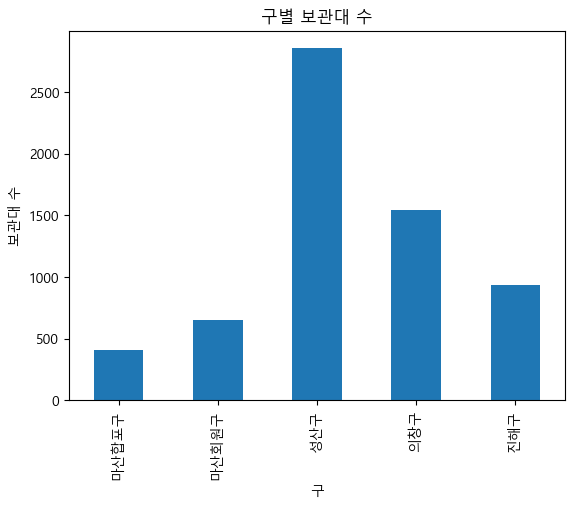

In [10]:
gu_data.plot.bar(), plt.ylabel('보관대 수'), plt.title('구별 보관대 수')

#### 1-2. "등록일자" 컬럼을 년도(예를들어 2011)만 표시하는 "년도" 컬럼으로 바꾸시오.   "년도" 컬럼의 값도 정수값으로 변환하고 결과 DataFrame을 처음 10개만 출력하시오.   


In [18]:
data['등록일자'] = data['등록일자'].str[:4]
data = data.rename(columns = {'등록일자' : '년도'})

In [20]:
data['년도'] = data['년도'].astype(int)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   번호      283 non-null    int64  
 1   터미널명    283 non-null    object 
 2   구       283 non-null    object 
 3   동       283 non-null    object 
 4   주소      283 non-null    object 
 5   년도      283 non-null    int32  
 6   보관대수    283 non-null    int64  
 7   위도      283 non-null    float64
 8   경도      283 non-null    float64
dtypes: float64(2), int32(1), int64(2), object(4)
memory usage: 18.9+ KB


#### 1-3. 최초 설치를 시작한 시작년도 부터 마지막 년도까지 보관대수를 누적하는 그래프를 그리시오  

In [47]:
data_year = data.groupby('년도').보관대수.sum()
data_year = data_year.to_frame()

In [53]:
data_year

,보관대수
년도,
2008,570
2009,1804
2010,1133
2011,1282
2012,225
2013,59
2014,137
2015,173
2016,235


In [44]:
s = 0
for i in range(len(data_year.index)):
    s = s + data_year.iloc[i]
    data_year.iloc[i] = s
data_year

년도
2008     570
2009    2374
2010    3507
2011    4789
2012    5014
2013    5073
2014    5210
2015    5383
2016    5618
2017    5816
2018    5935
2019    6105
2020    6243
2021    6392
Name: 보관대수, dtype: int64

(<AxesSubplot:xlabel='년도', ylabel='누적 보관대수'>, Text(0, 0.5, '누적 보관대수'))

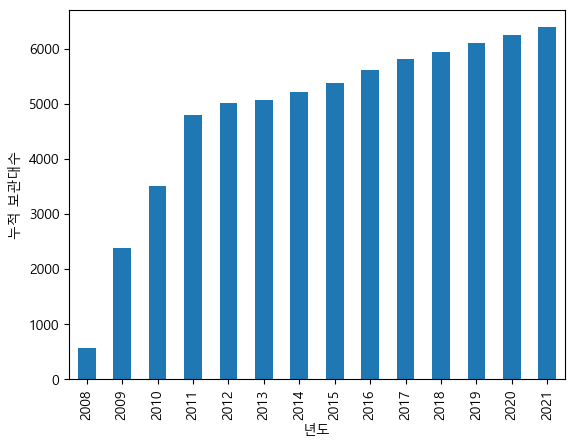

In [45]:
data_year.plot.bar(), plt.ylabel('누적 보관대수')

### 2. "연월별외국인방문객.xlsx"파일은 2015년 1월부터 2023년 3월까지 외국인 입국자 통계를 보여주고 있다. 
###      아래의 질문에 해당하는 코드를 작성하시오

In [20]:
import pandas as pd
df = pd.read_excel('연월별외국인방문객.xlsx')
df

,Unnamed: 0,관광,상용,공용,유학연수,기타,전체
0,201501,723255,17686,3094,7752,165267,917054
1,201502,815138,14354,2256,36399,182559,1050706
2,201503,958493,18549,3241,27129,230732,1238144
3,201504,1112904,17326,4913,5556,243868,1384567
4,201505,1060730,19010,4679,9222,240571,1334212
...,...,...,...,...,...,...,...
95,202212,434305,6920,3702,9988,84358,539273
96,202301,312847,7645,4145,13674,96118,434429
97,202302,319098,7383,3165,53111,96491,479248
98,202303,627681,10543,4719,30743,126889,800575


#### 2-1. "관광", "상용", "공용", "유학연수", "기타", "전체" 컬럼의 외국인 입국자 수를 년도별로 집계한 DataFrame을 만들어 출력하시오. 
#### 단, 2023년은 1월부터 3월까지의 평균치를 4월에서 12월에 적용하시오. 

In [21]:
new_data = df[:-1]
new_data

,Unnamed: 0,관광,상용,공용,유학연수,기타,전체
0,201501,723255,17686,3094,7752,165267,917054
1,201502,815138,14354,2256,36399,182559,1050706
2,201503,958493,18549,3241,27129,230732,1238144
3,201504,1112904,17326,4913,5556,243868,1384567
4,201505,1060730,19010,4679,9222,240571,1334212
...,...,...,...,...,...,...,...
94,202211,341686,9855,4750,6313,97302,459906
95,202212,434305,6920,3702,9988,84358,539273
96,202301,312847,7645,4145,13674,96118,434429
97,202302,319098,7383,3165,53111,96491,479248


In [22]:
df_2023 = new_data[new_data['Unnamed: 0'].str.contains('2023')]
df_2023

,Unnamed: 0,관광,상용,공용,유학연수,기타,전체
96,202301,312847,7645,4145,13674,96118,434429
97,202302,319098,7383,3165,53111,96491,479248
98,202303,627681,10543,4719,30743,126889,800575


In [23]:
df_2023['Unnamed: 0'] = df_2023['Unnamed: 0'].str[:4]
df_2023

C:\Users\82109\AppData\Local\Temp\ipykernel_19972\4009168777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['Unnamed: 0'] = df_2023['Unnamed: 0'].str[:4]


,Unnamed: 0,관광,상용,공용,유학연수,기타,전체
96,2023,312847,7645,4145,13674,96118,434429
97,2023,319098,7383,3165,53111,96491,479248
98,2023,627681,10543,4719,30743,126889,800575


In [24]:
df_2023 = df_2023.groupby('Unnamed: 0').mean()
df_2023.iloc[0]

관광      419875.333333
상용        8523.666667
공용        4009.666667
유학연수     32509.333333
기타      106499.333333
전체      571417.333333
Name: 2023, dtype: float64

In [25]:
new_data = new_data.set_index('Unnamed: 0')
new_data

,관광,상용,공용,유학연수,기타,전체
Unnamed: 0,,,,,,
201501,723255,17686,3094,7752,165267,917054
201502,815138,14354,2256,36399,182559,1050706
201503,958493,18549,3241,27129,230732,1238144
201504,1112904,17326,4913,5556,243868,1384567
201505,1060730,19010,4679,9222,240571,1334212
...,...,...,...,...,...,...
202211,341686,9855,4750,6313,97302,459906
202212,434305,6920,3702,9988,84358,539273
202301,312847,7645,4145,13674,96118,434429


In [26]:
l = []
for i in range(9):
    l.append(str((i+4)).zfill(2))
l

['04', '05', '06', '07', '08', '09', '10', '11', '12']

In [27]:
#new_data.loc['202304'] = df_2023.iloc[0]

In [28]:
for i in range(9):
    new_data.loc['2023'+l[i]] = df_2023.iloc[0]

In [29]:
new_data = new_data.reset_index()
new_data

,Unnamed: 0,관광,상용,공용,유학연수,기타,전체
0,201501,7.232550e+05,17686.000000,3094.000000,7752.000000,165267.000000,9.170540e+05
1,201502,8.151380e+05,14354.000000,2256.000000,36399.000000,182559.000000,1.050706e+06
2,201503,9.584930e+05,18549.000000,3241.000000,27129.000000,230732.000000,1.238144e+06
3,201504,1.112904e+06,17326.000000,4913.000000,5556.000000,243868.000000,1.384567e+06
4,201505,1.060730e+06,19010.000000,4679.000000,9222.000000,240571.000000,1.334212e+06
...,...,...,...,...,...,...,...
103,202308,4.198753e+05,8523.666667,4009.666667,32509.333333,106499.333333,5.714173e+05
104,202309,4.198753e+05,8523.666667,4009.666667,32509.333333,106499.333333,5.714173e+05
105,202310,4.198753e+05,8523.666667,4009.666667,32509.333333,106499.333333,5.714173e+05
106,202311,4.198753e+05,8523.666667,4009.666667,32509.333333,106499.333333,5.714173e+05


In [30]:
new_data['년도'] = new_data['Unnamed: 0'].str[:4]
new_data['년도']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
103    2023
104    2023
105    2023
106    2023
107    2023
Name: 년도, Length: 108, dtype: object

In [31]:
new_data = new_data.groupby('년도').sum()

In [32]:
new_data.loc['전체'] = new_data.sum()

In [33]:
new_data

,관광,상용,공용,유학연수,기타,전체
년도,,,,,,
2015,10135489.0,195325.0,48269.0,202708.0,2649860.0,13231651.0
2016,13932925.0,187507.0,51467.0,250716.0,2819208.0,17241823.0
2017,10415594.0,177071.0,54890.0,302652.0,2385551.0,13335758.0
2018,12414348.0,175547.0,61017.0,332011.0,2363956.0,15346879.0
2019,14432275.0,178445.0,74210.0,375661.0,2442165.0,17502756.0
2020,1653471.0,29509.0,16571.0,118462.0,701105.0,2519118.0
2021,211846.0,21290.0,18685.0,80084.0,635098.0,967003.0
2022,1998937.0,72170.0,35692.0,152195.0,939023.0,3198017.0
2023,5038504.0,102284.0,48116.0,390112.0,1277992.0,6857008.0


#### 2-2. 2-1번에서 구한 결과를 활용하여  "관광", "상용", "공용", "유학연수", "기타", "전체" 컬럼의 년도별 입국자수를 시각화 하시오. 
#### 전체 컬럼 수인 총 6개의 시각화 그림이 출력되도록 하시오. 


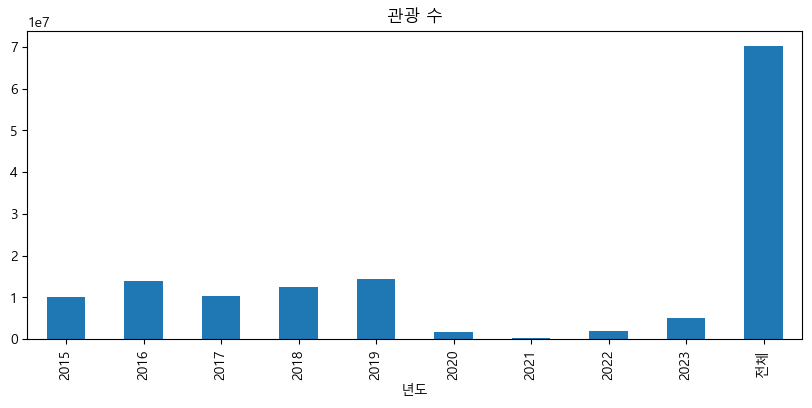

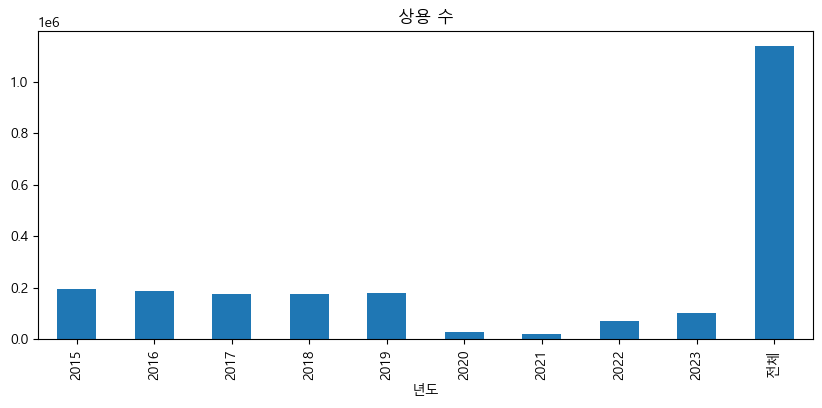

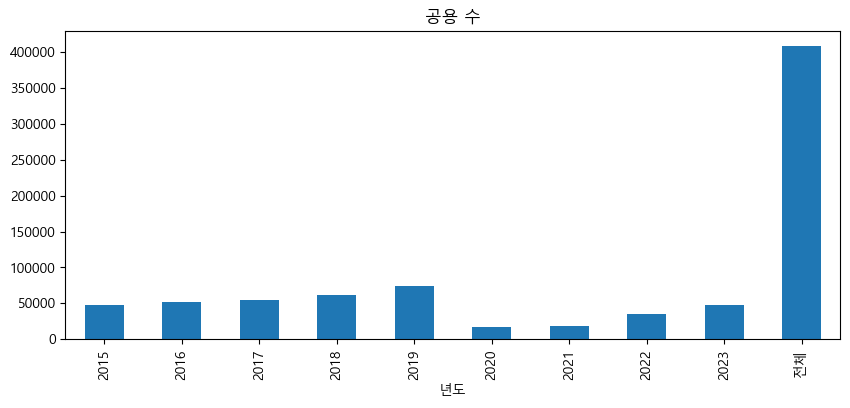

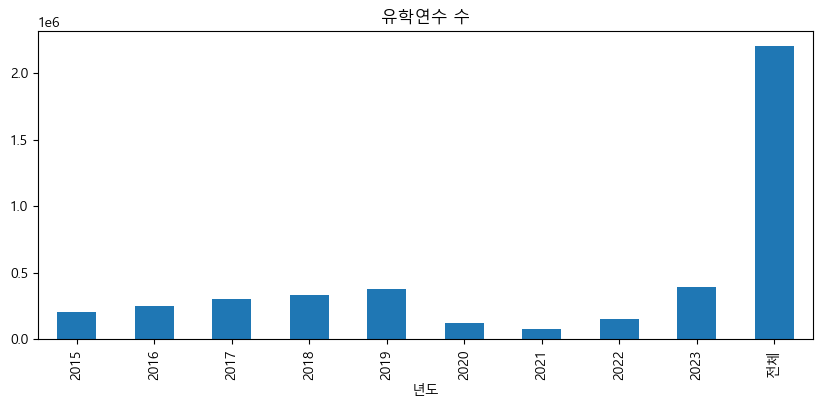

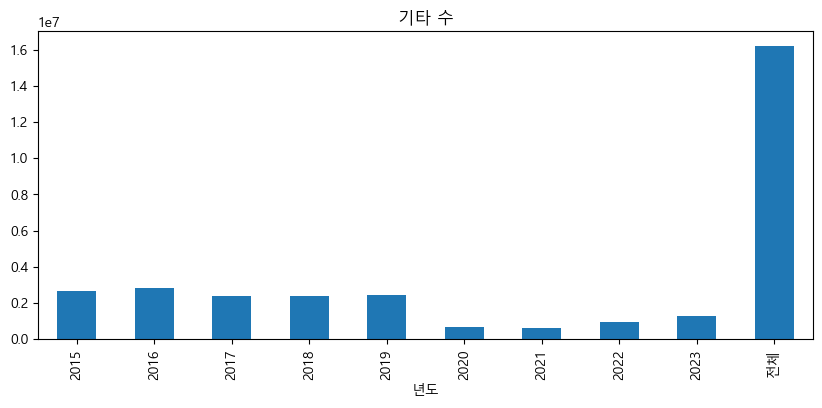

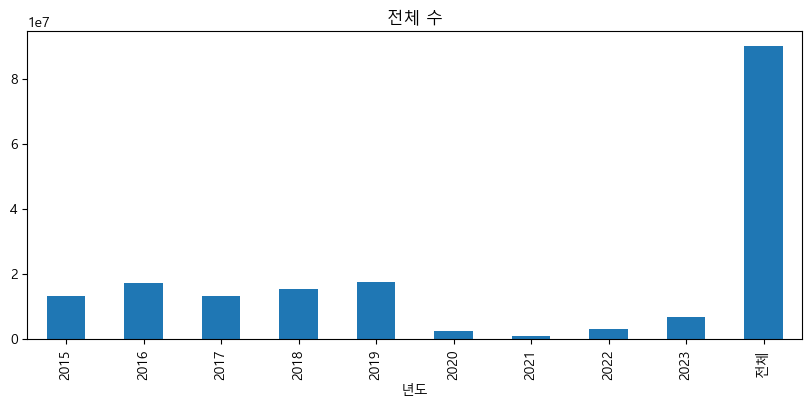

In [34]:
l = new_data.columns
for i in l:
    plt.figure(figsize=(10, 4))
    new_data[i].plot.bar(), plt.title('{} 수'.format(i))

#### 2-3. 2020- 2022년도는 코로나로 인하여 입국자수가 급감한것을 확인할 수있다. 2015년 1월에서 2023년 3월까지 월별 전체 입국자수를 시각화 하고, 코로나 시작시점을 화살표, text 등 각자 사용한 가능한 시각화 tool을 이용하여 표시하고 결과를 제시하시오.  

In [35]:
df = df.set_index('Unnamed: 0')

In [36]:
#corona = df[df.index.str.contains('2020|2022')].index

In [37]:
#corona_data = df[df.index.str.contains('2020|2022')]

([<matplotlib.axis.XTick at 0x1b2f31568b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

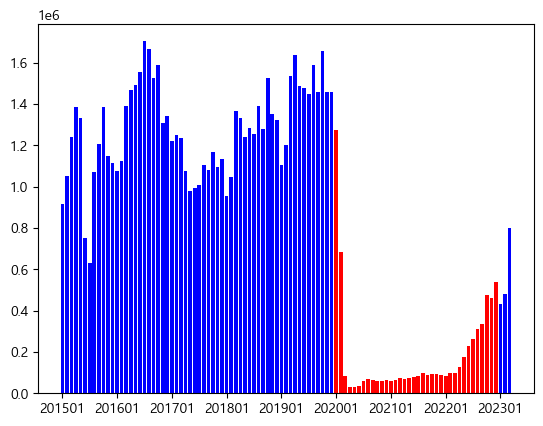

In [38]:
l = ['201501','201601','201701','201801','201901','202001','202101','202201','202301']
color = ['r' if '2020' in date or '2021' in date or '2022' in date else 'b' for date in df[:-1].index]
plt.bar(df[:-1].index, df[:-1].전체, color = color)
plt.xticks(l)



In [39]:
df[:-1].loc['201901'].전체

1104803

Text(98, 1104803.05, '코로나 시작시점')

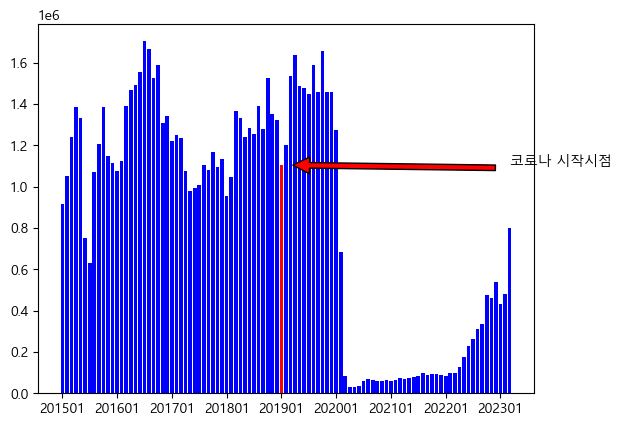

In [40]:
l = ['201501','201601','201701','201801','201901','202001','202101','202201','202301']
color = ['r' if '201901' in date else 'b' for date in df[:-1].index]
plt.bar(df[:-1].index, df[:-1].전체, color = color)
plt.xticks(l)
plt.annotate(('코로나 시작시점'),
             xy=(df[:-1].index.tolist().index('201901'),
                 df[:-1].loc['201901'].전체),
             xytext=(df[:-1].index.tolist().index('201901') + 50, df[:-1].loc['201901'].전체 + 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))